# Manual Gating of Cells in Sample MEL01-1-3

In [12]:
!pip install flowkit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 157.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 148.4 MB/s eta 0:00:00
  Created wheel for flowkit: filename=FlowKit-1.2.1-py3-none-any.whl size=109307 sha256=da21b08596e8dc86f8a632a311f6fda13686fa62d401cbed77a3b267fb75de18
  Stored in directory: /home/jupyter/.cache/pip/wheels/4a/fb/a9/0f078da56bd32002852db79007e626925db8239ed447325474
  Created wheel for flowio: filename=FlowIO-1.3.0-py3-none-any.whl size=18752 sha256=c0c319b59cd3a63cb69bd3f76f2da42128e2789b6fd6b88bdad7b8f85ca8274e
  Stored in directory: /home/jupyter/.cache/pip/wheels/96/26/b0/cf4bbfb53422

In [13]:
!pip install bokeh

In [28]:
!pip install --upgrade pandas

In [36]:
import os
import numpy as np
import anndata as ad
import pandas as pd
import bokeh
from bokeh.plotting import show
from bokeh.io import output_notebook
import flowkit as fk
bokeh.io.output_notebook()
from matplotlib import pyplot as plt

Loading BokehJS ...

In [2]:
data_dir = "single_sample_features"

In [3]:
mel0131_adata = ad.io.read_csv("single_sample_features/MEL01-3-1.csv")
mel0131_df = pd.read_csv("single_sample_features/MEL01-3-1.csv")

In [150]:
mel0131_df.columns

Index(['CellID', 'DNA_1_cellRingMask', 'bg2a_cellRingMask',
       'bg3a_cellRingMask', 'bg4a_cellRingMask', 'DNA_2_cellRingMask',
       'pERK_cellRingMask', 'CD207_cellRingMask', 'SOX10_cellRingMask',
       'DNA_3_cellRingMask', 'CD45RO_cellRingMask', 'SOX2_cellRingMask',
       'CD25_cellRingMask', 'DNA_4_cellRingMask', 'CD4_cellRingMask',
       'pan-CK_cellRingMask', 'CD8a_cellRingMask', 'DNA_5_cellRingMask',
       'CD163_cellRingMask', 'FOXP3_cellRingMask', 'CD3d_cellRingMask',
       'DNA_6_cellRingMask', 'pS6_cellRingMask', 'CD11c_cellRingMask',
       'PDL1_cellRingMask', 'DNA_7_cellRingMask', 'MCAM_cellRingMask',
       'CD68_cellRingMask', 'PD1_cellRingMask', 'DNA_8_cellRingMask',
       'S100a_cellRingMask', 'ICOS_cellRingMask', 'OX40_cellRingMask',
       'DNA_9_cellRingMask', 'CD40L_cellRingMask', 'HLADR_cellRingMask',
       'HLAA_cellRingMask', 'DNA_10_cellRingMask', 'NCAD_cellRingMask',
       'LAG3_cellRingMask', 'CD31_cellRingMask', 'DNA_11_cellRingMask',
       'C

In [4]:
#embeddings_adata = ad.read_h5ad('single_sample_features/cell_centered_embeddings/combined_embeddings.h5ad')

In [10]:
marker_cols = [s for s in mel0131_df.columns if "cellRingMask" in s]
new_marker_colnames = ["".join(s.split("_")[0:-1]) for s in marker_cols]
marker_colname_map = {
    k:s for k,s in zip(marker_cols, new_marker_colnames)
}

In [26]:
mel0131_marker_data = mel0131_df[marker_cols]
mel0131_marker_data = mel0131_marker_data.rename(columns=marker_colname_map)

In [53]:
mel0131_marker_data.head()

DNA1          bg2a          bg3a          bg4a         DNA2  \
0  2697.152381   1590.780952    409.104762   2922.390476  2004.676190   
1  2870.711340   4826.453608  17074.298969  19727.525773  1745.092784   
2  1267.146465  11114.823232   4125.888889   2063.707071   161.797980   
3  2610.397129   4731.617225   3445.248804   4096.464115  2112.196172   
4  2765.896739   4894.559783  25278.092391  28418.690217   911.271739   

           pERK        CD207         SOX10        DNA3       CD45RO  ...  \
0    933.304762    56.714286    293.961905  546.285714   926.857143  ...   
1  14042.432990  5055.886598  17586.072165  704.000000  2355.680412  ...   
2    625.580808    41.323232    369.732323   94.641414   701.267677  ...   
3   1685.191388   284.870813   1068.894737  695.076555   800.253589  ...   
4    821.065217    83.815217    459.054348  602.972826   763.750000  ...   

      HLADPB1         MART1       DNA14        CCND1         MYC         CD56  \
0  145.666667  12646.552381  289.809524  1604.714286  353.000000  2026.361905   
1  142.670103  12605.525773  197.185567  1578.484536  330.618557  2009.360825   
2  144.702020  12574.611111  237.560606  1573.393939  358.040404  1976.191919   
3  148.224880  12630.296651  246.043062  1576.861244  337.870813  2019.090909   
4  145.298913  12607.385870  286.858696  1577.434783  343.663043  1985.331522   

        DNA15        LAMP1        NOS2         CD16  
0  284.190476  2443.219048  781.590476  2243.104762  
1  152.061856  1957.628866  600.185567  2051.948454  
2  176.616162  1944.303030  578.318182  1981.106061  
3  194.052632  1985.473684  610.172249  2180.473684  
4  171.940217  1977.141304  601.755435  2075.711957  

[5 rows x 61 columns]

In [84]:
# scale the data to 0 mean and unit variance
mel0131_transform = mel0131_marker_data.map(np.log10)
mel0131_scaled = (mel0131_transform - np.mean(mel0131_transform, axis=0))/np.std(mel0131_transform, axis=0)

In [27]:
mel0131_marker_data.columns

Index(['DNA1', 'bg2a', 'bg3a', 'bg4a', 'DNA2', 'pERK', 'CD207', 'SOX10',
       'DNA3', 'CD45RO', 'SOX2', 'CD25', 'DNA4', 'CD4', 'pan-CK', 'CD8a',
       'DNA5', 'CD163', 'FOXP3', 'CD3d', 'DNA6', 'pS6', 'CD11c', 'PDL1',
       'DNA7', 'MCAM', 'CD68', 'PD1', 'DNA8', 'S100a', 'ICOS', 'OX40', 'DNA9',
       'CD40L', 'HLADR', 'HLAA', 'DNA10', 'NCAD', 'LAG3', 'CD31', 'DNA11',
       'CD73', 'CD90', 'TIM3', 'DNA12', 'C-Kit', 'CD40', 'Granz.B', 'DNA13',
       'HLADRB1', 'GITR', 'HLADPB1', 'MART1', 'DNA14', 'CCND1', 'MYC', 'CD56',
       'DNA15', 'LAMP1', 'NOS2', 'CD16'],
      dtype='object')

In [85]:
#fk_obj = fk.Sample(mel0131_marker_data, sample_id='mel0131')
mel0131_fk = fk.Sample(mel0131_scaled, sample_id = 'mel0131')

In [60]:
mel0131_fk.channels

channel_number    pnn pns  png         pne       pnr
0                1   DNA1      1.0  (0.0, 0.0)  262144.0
1                2   bg2a      1.0  (0.0, 0.0)  262144.0
2                3   bg3a      1.0  (0.0, 0.0)  262144.0
3                4   bg4a      1.0  (0.0, 0.0)  262144.0
4                5   DNA2      1.0  (0.0, 0.0)  262144.0
..             ...    ...  ..  ...         ...       ...
56              57   CD56      1.0  (0.0, 0.0)  262144.0
57              58  DNA15      1.0  (0.0, 0.0)  262144.0
58              59  LAMP1      1.0  (0.0, 0.0)  262144.0
59              60   NOS2      1.0  (0.0, 0.0)  262144.0
60              61   CD16      1.0  (0.0, 0.0)  262144.0

[61 rows x 6 columns]

In [87]:
logicle_xform = fk.transforms.LogicleTransform(
    param_t=262144,
    param_w=0.5,
    param_m=4.5,
    param_a=0
)
mel0131_fk.apply_transform(logicle_xform)

In [114]:
# create a gating strategy to gate the data set
g_strat = fk.GatingStrategy()

## Visualize and Gate

### Gating Tumor Cells

In [115]:
p = mel0131_fk.plot_contour('SOX10', 'CD3d', source='raw', fill=True, plot_events=True)
bokeh.io.show(p)

In [116]:
# set a gate name
gate_name = "tumor"

# set gate dimensions
x_channel = fk.Dimension("SOX10")  # Replace with the correct channel name for x-axis
y_channel = fk.Dimension("CD3d") # Replace with the correct channel name for y-axis

# set gate vertices
vertices = [
    (-0.7, -1.1), # bottom left
    (2, -1.8), # bottom right
    (2, 1), # top right
    (-0.13, -1) # top left
]

# create the gate
tumor_gate = fk.gates.PolygonGate(
    gate_name,
    dimensions=[x_channel, y_channel],
    vertices=vertices
)

# add gate to gating strategy
g_strat.add_gate(tumor_gate, gate_path=("root",))

### Gating Double Positive CD8/CD3 Cells

In [117]:
# display plot
p = mel0131_fk.plot_contour('CD8a', 'CD3d', source='raw', fill=True, plot_events=True)
bokeh.io.show(p)

In [118]:
# after plotting, set the gating strategy
# set a gate name
gate_name = "double_positive_T"

# set gate dimensions
x_channel = fk.Dimension("CD8a")  # Replace with the correct channel name for x-axis
y_channel = fk.Dimension("CD3d") # Replace with the correct channel name for y-axis

# set gate vertices
vertices = [
    (1.5, 0), # bottom left
    (5, 0), # bottom right
    (5, 6.3), # top right
    (1.5, 6.3) # top left
]

# create the gate
tumor_gate = fk.gates.PolygonGate(
    gate_name,
    dimensions=[x_channel, y_channel],
    vertices=vertices
)

# add gate to gating strategy
g_strat.add_gate(tumor_gate, gate_path=("root",))

### Exhausted T Cell

In [119]:
# display plot
p = mel0131_fk.plot_contour('CD8a', 'PD1', source='raw', fill=True, plot_events=True)
bokeh.io.show(p)

In [120]:
# after plotting, set the gating strategy
# set a gate name
gate_name = "exhausted_T"

# set gate dimensions
x_channel = fk.Dimension("CD8a")  # Replace with the correct channel name for x-axis
y_channel = fk.Dimension("CD3d") # Replace with the correct channel name for y-axis

# set gate vertices
vertices = [
    (1, 0.7), # bottom left
    (5, 0.7), # bottom right
    (5, 7), # top right
    (1, 7) # top left
]

# create the gate
tumor_gate = fk.gates.PolygonGate(
    gate_name,
    dimensions=[x_channel, y_channel],
    vertices=vertices
)

# add gate to gating strategy
g_strat.add_gate(tumor_gate, gate_path=("root",))

### Gating PDL1 Tumor Cells

In [121]:
# display plot
p = mel0131_fk.plot_contour('SOX10', 'PDL1', source='raw', fill=True, plot_events=True)
bokeh.io.show(p)

In [122]:
# after plotting, set the gating strategy
# set a gate name
gate_name = "pdl1_tumor"

# set gate dimensions
x_channel = fk.Dimension("SOX10")  # Replace with the correct channel name for x-axis
y_channel = fk.Dimension("PDL1") # Replace with the correct channel name for y-axis

# set gate vertices
vertices = [
    (0, 3), # bottom left
    (3, 3), # bottom right
    (3, 25), # top right
    (0, 25) # top left
]

# create the gate
tumor_gate = fk.gates.PolygonGate(
    gate_name,
    dimensions=[x_channel, y_channel],
    vertices=vertices
)

# add gate to gating strategy
g_strat.add_gate(tumor_gate, gate_path=("root",))

### Gating CD4 T Cells

In [123]:
# display plot
p = mel0131_fk.plot_contour('CD4', 'CD3d', source='raw', fill=True, plot_events=True)
bokeh.io.show(p)

In [124]:
# after plotting, set the gating strategy
# set a gate name
gate_name = "CD4"

# set gate dimensions
x_channel = fk.Dimension("CD4")  # Replace with the correct channel name for x-axis
y_channel = fk.Dimension("CD3d") # Replace with the correct channel name for y-axis

# set gate vertices
vertices = [
    (1, 1), # bottom left
    (6.3, 1), # bottom right
    (6.3, 6.3), # top right
    (1, 6.3) # top left
]

# create the gate
tumor_gate = fk.gates.PolygonGate(
    gate_name,
    dimensions=[x_channel, y_channel],
    vertices=vertices
)

# add gate to gating strategy
g_strat.add_gate(tumor_gate, gate_path=("root",))

### Gating Dendritic Cells

In [125]:
# display plot
p = mel0131_fk.plot_contour('CD11c', 'SOX10', source='raw', fill=True, plot_events=True)
bokeh.io.show(p)

In [126]:
# after plotting, set the gating strategy
# set a gate name
gate_name = "dendritic_cell"

# set gate dimensions
x_channel = fk.Dimension("CD11c")  # Replace with the correct channel name for x-axis
y_channel = fk.Dimension("SOX10") # Replace with the correct channel name for y-axis

# set gate vertices
vertices = [
    (1, -2), # bottom left
    (5, -2), # bottom right
    (5, 3), # top right
    (1, 3) # top left
]

# create the gate
tumor_gate = fk.gates.PolygonGate(
    gate_name,
    dimensions=[x_channel, y_channel],
    vertices=vertices
)

# add gate to gating strategy
g_strat.add_gate(tumor_gate, gate_path=("root",))

### Gating M2 Macrophages

In [127]:
# display plot
p = mel0131_fk.plot_contour('CD163', 'SOX10', source='raw', fill=True, plot_events=True)
bokeh.io.show(p)

In [128]:
# after plotting, set the gating strategy
# set a gate name
gate_name = "m2_macrophage"

# set gate dimensions
x_channel = fk.Dimension("CD163")  # Replace with the correct channel name for x-axis
y_channel = fk.Dimension("SOX10") # Replace with the correct channel name for y-axis

# set gate vertices
vertices = [
    (1, -2), # bottom left
    (5, -2), # bottom right
    (5, 3), # top right
    (1, 3) # top left
]

# create the gate
tumor_gate = fk.gates.PolygonGate(
    gate_name,
    dimensions=[x_channel, y_channel],
    vertices=vertices
)

# add gate to gating strategy
g_strat.add_gate(tumor_gate, gate_path=("root",))

### Gating Treg

In [129]:
# display plot
p = mel0131_fk.plot_contour('CD3d', 'FOXP3', source='raw', fill=True, plot_events=True)
bokeh.io.show(p)

In [130]:
# after plotting, set the gating strategy
# set a gate name
gate_name = "Treg"

# set gate dimensions
x_channel = fk.Dimension("CD3d")  # Replace with the correct channel name for x-axis
y_channel = fk.Dimension("FOXP3") # Replace with the correct channel name for y-axis

# set gate vertices
vertices = [
    (0.8, 1.9), # bottom left
    (7, 1.9), # bottom right
    (7, 12), # top right
    (0.8, 12) # top left
]

# create the gate
tumor_gate = fk.gates.PolygonGate(
    gate_name,
    dimensions=[x_channel, y_channel],
    vertices=vertices
)

# add gate to gating strategy
g_strat.add_gate(tumor_gate, gate_path=("root",))

## Check Gate Results

In [147]:
# Get gate results
gate_results = g_strat.gate_sample(mel0131_fk)

# get the names of each gate
gate_names = [g[0] for g in g_strat.get_gate_ids()]

# Print some results
for gn in gate_names:
    print(f"Total count of cells within {gn}: {gate_results.get_gate_count(gn)}")
    print(f"Percentage of cells within {gn}: {gate_results.get_gate_absolute_percent(gn):.2f}%")

Total count of cells within tumor: 265382
Percentage of cells within tumor: 42.77%
Total count of cells within double_positive_T: 51882
Percentage of cells within double_positive_T: 8.36%
Total count of cells within exhausted_T: 50317
Percentage of cells within exhausted_T: 8.11%
Total count of cells within pdl1_tumor: 2042
Percentage of cells within pdl1_tumor: 0.33%
Total count of cells within CD4: 36145
Percentage of cells within CD4: 5.83%
Total count of cells within dendritic_cell: 99417
Percentage of cells within dendritic_cell: 16.02%
Total count of cells within m2_macrophage: 72050
Percentage of cells within m2_macrophage: 11.61%
Total count of cells within Treg: 10940
Percentage of cells within Treg: 1.76%


## Apply Gating Strategy

In [149]:
cell_phenotypes = pd.DataFrame({
    gn:gate_results.get_gate_membership(gn) for gn in gate_names
})
cell_phenotypes

tumor  double_positive_T  exhausted_T  pdl1_tumor    CD4  \
0       False              False        False       False  False   
1        True              False        False       False  False   
2       False              False        False       False  False   
3       False              False        False       False  False   
4       False              False        False       False  False   
...       ...                ...          ...         ...    ...   
620447  False              False        False       False  False   
620448  False              False        False       False  False   
620449  False              False        False       False  False   
620450  False              False        False       False  False   
620451  False              False        False       False  False   

        dendritic_cell  m2_macrophage   Treg  
0                False          False  False  
1                False          False  False  
2                False          False  False  
3                False          False  False  
4                False          False  False  
...                ...            ...    ...  
620447           False          False  False  
620448           False          False  False  
620449           False          False  False  
620450           False          False  False  
620451           False          False  False  

[620452 rows x 8 columns]

In [159]:
cell_phenotypes['label_count'] = cell_phenotypes.select_dtypes(include=['bool']).sum(axis=1)
cell_phenotypes[cell_phenotypes['label_count'] > 2]

tumor  double_positive_T  exhausted_T  pdl1_tumor    CD4  \
70      False               True         True       False  False   
92      False               True         True       False  False   
95      False               True         True       False   True   
133     False               True         True       False   True   
219     False               True         True       False   True   
...       ...                ...          ...         ...    ...   
618644  False              False        False       False   True   
618768  False               True         True       False  False   
619236  False              False        False       False   True   
619834  False              False        False       False   True   
620146  False               True         True       False  False   

        dendritic_cell  m2_macrophage   Treg  label_count  
70                True          False  False            3  
92                True           True  False            4  
95                True           True  False            5  
133              False          False  False            3  
219              False          False  False            3  
...                ...            ...    ...          ...  
618644            True           True  False            3  
618768           False           True  False            3  
619236           False           True   True            3  
619834           False           True   True            3  
620146           False           True  False            3  

[44364 rows x 9 columns]

In [166]:
cell_types = []
for index, row in cell_phenotypes.iterrows():
    if row['label_count'] == 0:
        cell_types.append('unknown')
    elif row['label_count'] == 1:
        # Find the True column (excluding label_count)
        true_columns = [col for col in cell_phenotypes.columns[:-1] if row[col]] # Exclude 'label_count'
        cell_types.append(true_columns[0])
    else:
        cell_types.append('multiple')

['unknown',
 'tumor',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'dendritic_cell',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'multiple',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown'

In [168]:
mel_cell_df = mel0131_df[['CellID', 'column_centroid', 'row_centroid']]
mel_cell_df['cell_type'] = cell_types

/var/tmp/ipykernel_29895/350009497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mel_cell_df['cell_type'] = cell_types


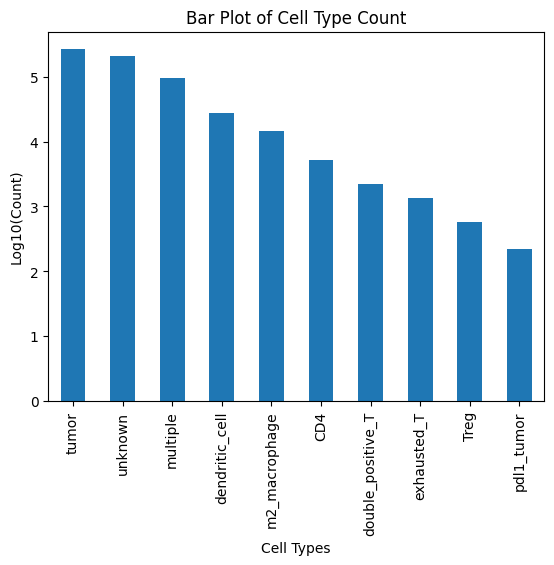

In [176]:
counts = np.log10(mel_cell_df['cell_type'].value_counts())

# Create the bar plot
counts.plot.bar()
plt.xlabel('Cell Types')
plt.ylabel('Log10(Count)')
plt.title('Bar Plot of Cell Type Count')
plt.show()

In [178]:
mel_cell_df.head()

CellID  column_centroid  row_centroid cell_type
0       1     31448.676190    416.133333   unknown
1       2     30987.855670   1109.628866     tumor
2       3     30686.808081   1131.671717   unknown
3       4     30923.009569   1174.349282   unknown
4       5     30872.038043   1234.097826   unknown

## Filter Cell Type Calls for ROI \#573

In [179]:
row_start = 9600
col_start = 33280
row_step_size = 1000
col_step_size = 1300

In [182]:
roi_cell_df = mel_cell_df[
 (mel_cell_df['column_centroid'] > col_start) & (mel_cell_df['column_centroid'] < (col_start+col_step_size)) &
    (mel_cell_df['row_centroid'] > row_start) & (mel_cell_df['row_centroid'] < (row_start+row_step_size))
]
roi_cell_df.shape

(2237, 4)

## Saveout

In [183]:
mel_cell_df.to_csv(os.path.join(data_dir, "cell_type_assignments/MEL01-3-1-manual-cell-phenotypes.csv"))

In [184]:
roi_cell_df.to_csv(os.path.join(data_dir, "cell_type_assignments/region_subset_files/MEL01-3-1_roi_573_row_9600_col_33280-manual-cell-phenotypes.csv"))

## Plotting Sanity Check

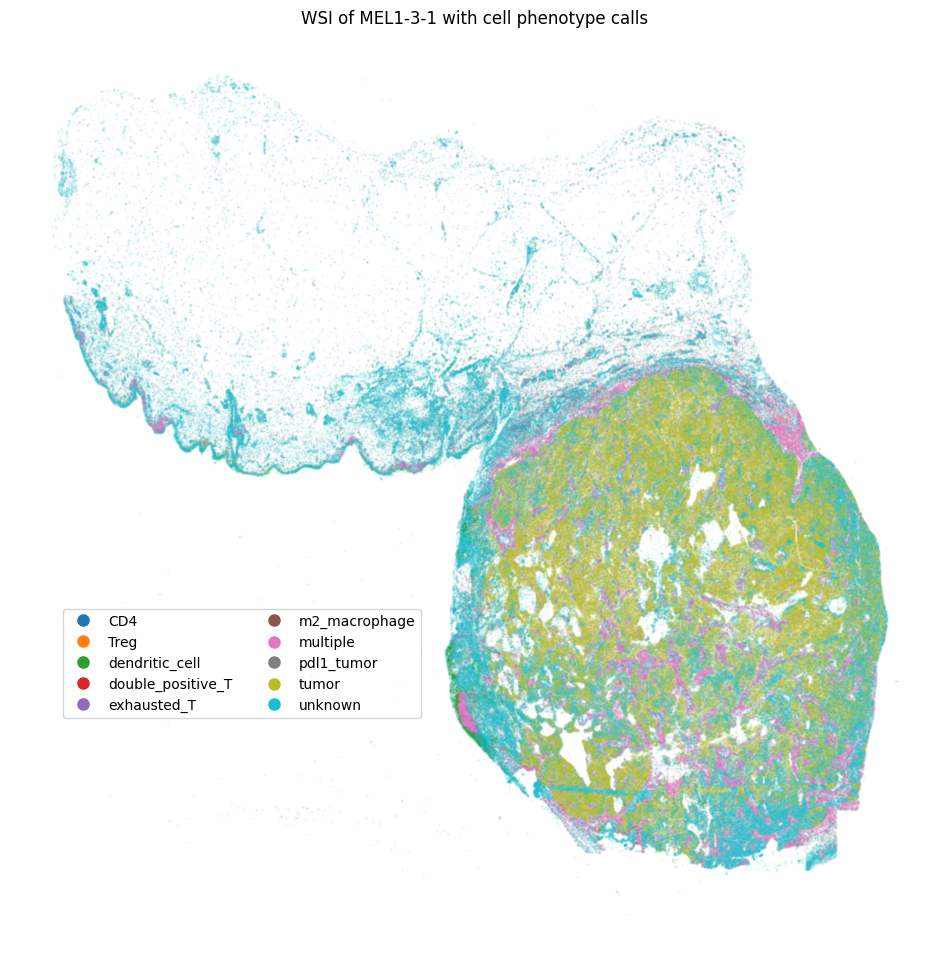

In [202]:
grouped = mel_cell_df.groupby('cell_type')
fig, ax = plt.subplots(figsize=(12,12))
for key, grp in grouped:
    ax.scatter(grp['column_centroid'], grp['row_centroid'], label=key, marker='.', s=1, alpha=0.1)
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for j, handle in enumerate(handles):
    label_color = handle.properties()['facecolor']
    new_handle = plt.Line2D([], [], color=label_color, alpha=1.0, marker='o', linestyle='', markersize=8)
    new_handles.append(new_handle)
ax.legend(new_handles, labels, loc='lower left', ncol=2, bbox_to_anchor=(0.05, 0.25))
ax.axis('off')
ax.set_title('WSI of MEL1-3-1 with cell phenotype calls')
plt.show()